In [ ]:
import numpy as np
import matplotlib.pyplot as py
import pandas as pd

In [ ]:
#Part A: Initial Data Exploration

#1.Data loading and Overview
#load csv files
orders = pd.read_csv('/content/olist_orders_dataset.csv')
#import customers data
customers = pd.read_csv('/content/olist_customers_dataset.csv')
#import products data
products= pd.read_csv('/content/olist_products_dataset.csv')
#import geolocation data
geo = pd.read_csv('/content/olist_geolocation_dataset.csv')
#import order items data
order_items = pd.read_csv('/content/olist_order_items_dataset.csv')
#import order payments data
order_payments = pd.read_csv('/content/olist_order_payments_dataset.csv')
#import order reviews data
order_reviews = pd.read_csv('/content/olist_order_reviews_dataset.csv')
#import sellers data
sellers = pd.read_csv('/content/olist_sellers_dataset.csv')
#import product category data
product_category = pd.read_csv('/content/product_category_name_translation.csv')


In [ ]:
orders.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date'],
      dtype='object')

In [ ]:
customers.columns

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state'],
      dtype='object')

In [ ]:
products.columns

Index(['product_id', 'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm'],
      dtype='object')

In [ ]:
geo.columns

Index(['geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng',
       'geolocation_city', 'geolocation_state'],
      dtype='object')

In [ ]:
order_items.columns

Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value'],
      dtype='object')

In [ ]:
order_payments.columns

Index(['order_id', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value'],
      dtype='object')

In [ ]:
order_reviews.columns

Index(['review_id', 'order_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp'],
      dtype='object')

In [ ]:
sellers.columns

Index(['seller_id', 'seller_zip_code_prefix', 'seller_city', 'seller_state'], dtype='object')

In [ ]:
product_category.columns

Index(['product_category_name', 'product_category_name_english'], dtype='object')

In [ ]:
#merge orders and customers
print(orders.shape)
print(customers.shape)
df = pd.merge(orders, customers, on='customer_id', how='left')
print(df.shape)

(99441, 8)
(99441, 5)
(99441, 12)


In [ ]:
# Define a data dictionary manually or programmatically
data_dictionary = {
    "customers": {
        "customer_id": "identifier for each customer",
        "customer_unique_id": "Unique identifier for each customer",
        "customer_zip_code_prefix": "customer zip code",
        "customer_city": "city",
        "customer_state": "state"
    },
    "orders": {
        "order_id": "identifier for each order",
        "customer_id": "identifier for each customer",
        "order_status": "status of the order",
        "order_purchase_timestamp": "timestamp of the order",
        "order_approved_at": "timestamp of the order",
        "order_delivered_carrier_date": "timestamp of the order",
        "order_delivered_customer_date": "timestamp of the order",
        "order_estimated_delivery_date": "timestamp of the order"
    },
    "products": {
        "product_id": "identifier for each product",
        "product_category_name": "category of the product",
        "product_name_lenght": "length of the product name",
        "product_description_lenght": "length of the product description",
        "product_photos_qty": "number of photos",
        "product_weight_g": "weight of the product",
        "product_length_cm": "length of the product",
        "product_height_cm": "height of the product",
        "product_width_cm": "width of the product"
    },
    "geolocation": {
        "geolocation_zip_code_prefix": "zip code",
        "geolocation_lat": "latitude",
        "geolocation_lng": "longitude",
        "geolocation_city": "city",
        "geolocation_state": "state"
    },
    "order_items": {
        "order_id": "identifier for each order",
        "order_item_id": "identifier for each order item",
        "product_id": "identifier for each product",
        "seller_id": "identifier for each seller",
        "shipping_limit_date": "timestamp of the order",
        "price": "price of the product",
        "freight_value": "freight value"
    },
    "order_payments": {
        "order_id": "identifier for each order",
        "payment_sequential": "sequential number of the payment",
        "payment_type": "type of the payment",
        "payment_installments": "number of installments",
        "payment_value": "value of the payment"
    },
    "order_reviews": {
        "review_id": "identifier for each review",
        "order_id": "identifier for each order",
        "review_score": "score of the review",
        "review_comment_title": "title of the review",
        "review_comment_message": "message of the review",
        "review_creation_date": "timestamp of the review",
        "review_answer_timestamp": "timestamp of the review"
    },
    "sellers": {
        "seller_id": "identifier for each seller",
        "seller_zip_code_prefix": "zip code",
        "seller_city": "city",
        "seller_state": "state"
    },
    "product_category": {
        "product_category_name": "category of the product",
        "product_category_name_english": "english name of the category"
    }
}
# Save the data dictionary to a file
pd.DataFrame(data_dictionary).to_csv('data_dictionary.csv', index=False)
print("Data dictionary has been saved to 'data_dictionary.csv'.")


Data dictionary has been saved to 'data_dictionary.csv'.


In [ ]:
# Example relationships
relationships = {
    "customers.customer_id": "orders.customer_id (1-to-many)",
    "orders.order_id": "order_items.order_id (1-to-many)",
    "orders.order_id": "order_reviews.order_id (1-to-many)",
    "orders.order_id": "order_payments.order_id (1-to-many)",
    "products.product_id": "order_items.product_id (1-to-many)",
    "sellers.seller_id": "order_items.seller_id (1-to-many)",
    "sellers.seller_zip_code_prefix": "geolocation.geolocation_zip_code_prefix (1-to-many)",
    "customers.customer_zip_code_prefix": "geolocation.geolocation_zip_code_prefix (1-to-many)"
}
print("Table Relationships:")
for key, value in relationships.items():
 print(f"{key} -> {value}")

Table Relationships:
customers.customer_id -> orders.customer_id (1-to-many)
orders.order_id -> order_payments.order_id (1-to-many)
products.product_id -> order_items.product_id (1-to-many)
sellers.seller_id -> order_items.seller_id (1-to-many)
sellers.seller_zip_code_prefix -> geolocation.geolocation_zip_code_prefix (1-to-many)
customers.customer_zip_code_prefix -> geolocation.geolocation_zip_code_prefix (1-to-many)


In [ ]:
#2.Data Quality Assessments
#Identifying missing values in each column
#orders_dataset
ecommerce_data = pd.read_csv('/content/olist_orders_dataset.csv')
missing_values = ecommerce_data.isnull().sum()
print("Missing Values in Each Column:")
print(missing_values)

# Percentage of missing values
missing_percentage = (missing_values / len(ecommerce_data)) * 100
print("\nPercentage of Missing Values:")
print(missing_percentage)

#customers dataset
#Identifying missing values in each column
ecommerce_data = pd.read_csv('/content/olist_customers_dataset.csv')
missing_values = ecommerce_data.isnull().sum()
print("Missing Values in Each Column:")
print(missing_values)

# Percentage of missing values
missing_percentage = (missing_values / len(ecommerce_data)) * 100
print("\nPercentage of Missing Values:")
print(missing_percentage)

#geolocation dataset
#Identifying missing values in each column
ecommerce_data = pd.read_csv('/content/olist_geolocation_dataset.csv')
missing_values = ecommerce_data.isnull().sum()
print("Missing Values in Each Column:")
print(missing_values)

# Percentage of missing values
missing_percentage = (missing_values / len(ecommerce_data)) * 100
print("\nPercentage of Missing Values:")
print(missing_percentage)

#Order_items dataset
#Identifying missing values in each column
ecommerce_data = pd.read_csv('/content/olist_order_items_dataset.csv')
missing_values = ecommerce_data.isnull().sum()
print("Missing Values in Each Column:")
print(missing_values)

# Percentage of missing values
missing_percentage = (missing_values / len(ecommerce_data)) * 100
print("\nPercentage of Missing Values:")
print(missing_percentage)

#order_payments dataset
#Identifying missing values in each column
ecommerce_data = pd.read_csv('/content/olist_order_payments_dataset.csv')
missing_values = ecommerce_data.isnull().sum()
print("Missing Values in Each Column:")
print(missing_values)

# Percentage of missing values
missing_percentage = (missing_values / len(ecommerce_data)) * 100
print("\nPercentage of Missing Values:")
print(missing_percentage)

#order_reviews dataset
#Identifying missing values in each column
ecommerce_data = pd.read_csv('/content/olist_order_reviews_dataset.csv')
missing_values = ecommerce_data.isnull().sum()
print("Missing Values in Each Column:")
print(missing_values)

# Percentage of missing values
missing_percentage = (missing_values / len(ecommerce_data)) * 100
print("\nPercentage of Missing Values:")
print(missing_percentage)

#products dataset
#Identifying missing values in each column
ecommerce_data = pd.read_csv('/content/olist_products_dataset.csv')
missing_values = ecommerce_data.isnull().sum()
print("Missing Values in Each Column:")
print(missing_values)

# Percentage of missing values
missing_percentage = (missing_values / len(ecommerce_data)) * 100
print("\nPercentage of Missing Values:")
print(missing_percentage)

#product_category dataset
#Identifying missing values in each column
ecommerce_data = pd.read_csv('/content/product_category_name_translation.csv')
missing_values = ecommerce_data.isnull().sum()
print("Missing Values in Each Column:")
print(missing_values)

# Percentage of missing values
missing_percentage = (missing_values / len(ecommerce_data)) * 100
print("\nPercentage of Missing Values:")
print(missing_percentage)

#sellers dataset
#Identifying missing values in each column
ecommerce_data = pd.read_csv('/content/olist_sellers_dataset.csv')
missing_values = ecommerce_data.isnull().sum()
print("Missing Values in Each Column:")
print(missing_values)

# Percentage of missing values
missing_percentage = (missing_values / len(ecommerce_data)) * 100
print("\nPercentage of Missing Values:")
print(missing_percentage)


Missing Values in Each Column:
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Percentage of Missing Values:
order_id                         0.000000
customer_id                      0.000000
order_status                     0.000000
order_purchase_timestamp         0.000000
order_approved_at                0.160899
order_delivered_carrier_date     1.793023
order_delivered_customer_date    2.981668
order_estimated_delivery_date    0.000000
dtype: float64
Missing Values in Each Column:
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

Percentage of Missing Values:
customer_id                 0.0
customer_uniq

In [ ]:
# Check for duplicate rows
#customers dataset
ecommerce_data = pd.read_csv('/content/olist_customers_dataset.csv')
duplicate_count = ecommerce_data.duplicated().sum()

print(f"Number of Duplicate Entries in customers: {duplicate_count}")

#geolocation datset
ecommerce_data = pd.read_csv('/content/olist_geolocation_dataset.csv')
duplicate_count = ecommerce_data.duplicated().sum()

print(f"Number of Duplicate Entries in geolocation: {duplicate_count}")

#order_items dataset
ecommerce_data = pd.read_csv('/content/olist_order_items_dataset.csv')
duplicate_count = ecommerce_data.duplicated().sum()

print(f"Number of Duplicate Entries in prder_items: {duplicate_count}")

#order_payments dataset
ecommerce_data = pd.read_csv('/content/olist_order_items_dataset.csv')
duplicate_count = ecommerce_data.duplicated().sum()

print(f"Number of Duplicate Entries in order_payments: {duplicate_count}")

#order_payments dataset
ecommerce_data = pd.read_csv('/content/olist_order_payments_dataset.csv')
duplicate_count = ecommerce_data.duplicated().sum()

print(f"Number of Duplicate Entries in order_reviews: {duplicate_count}")

#order_reviews dataset
ecommerce_data = pd.read_csv('/content/olist_order_reviews_dataset.csv')
duplicate_count = ecommerce_data.duplicated().sum()

print(f"Number of Duplicate Entries orders: {duplicate_count}")

#orders dataset
ecommerce_data = pd.read_csv('/content/olist_orders_dataset.csv')
duplicate_count = ecommerce_data.duplicated().sum()

print(f"Number of Duplicate Entries orders: {duplicate_count}")

#products dataset
ecommerce_data = pd.read_csv('/content/olist_products_dataset.csv')
duplicate_count = ecommerce_data.duplicated().sum()

print(f"Number of Duplicate Entries in products: {duplicate_count}")

#sellers
ecommerce_data = pd.read_csv('/content/olist_sellers_dataset.csv')
duplicate_count = ecommerce_data.duplicated().sum()

print(f"Number of Duplicate Entries in sellers: {duplicate_count}")

#product_category
ecommerce_data = pd.read_csv('/content/product_category_name_translation.csv')
duplicate_count = ecommerce_data.duplicated().sum()

print(f"Number of Duplicate Entries in product_category: {duplicate_count}")

Number of Duplicate Entries in customers: 0
Number of Duplicate Entries in geolocation: 261831
Number of Duplicate Entries in prder_items: 0
Number of Duplicate Entries in order_payments: 0
Number of Duplicate Entries in order_reviews: 0
Number of Duplicate Entries orders: 0
Number of Duplicate Entries orders: 0
Number of Duplicate Entries in products: 0
Number of Duplicate Entries in sellers: 0
Number of Duplicate Entries in product_category: 0


In [ ]:
#Verify data of each column
#Display data types of each column
ecommerce_data = pd.read_csv('/content/olist_orders_dataset.csv')
print("\nData Types of Each Column:")
print(ecommerce_data.dtypes)

# Check for inconsistent types
# Example: If 'order_purchase_timestamp' is expected to be numeric, ensure it's correctly typed
if not pd.api.types.is_numeric_dtype(ecommerce_data['order_purchase_timestamp']):
    ecommerce_data['order_purchase_timestamp'] = pd.to_numeric(ecommerce_data['order_purchase_timestamp'], errors='coerce')
    print("\nConverted 'order_purchase_timestamp' to numeric type.")

ecommerce_data = pd.read_csv('/content/olist_customers_dataset.csv')
print("\nData Types of Each Column:")
print(ecommerce_data.dtypes)
if not pd.api.types.is_numeric_dtype(ecommerce_data['customer_zip_code_prefix']):
    ecommerce_data['customer_zip_code_prefix'] = pd.to_numeric(ecommerce_data['customer_zip_code_prefix'], errors='coerce')
    print("\nConverted 'customer_zip_code_prefix' to numeric type.")

ecommerce_data = pd.read_csv('/content/olist_geolocation_dataset.csv')
print("\nData Types of Each Column:")
print(ecommerce_data.dtypes)
if not pd.api.types.is_numeric_dtype(ecommerce_data['geolocation_zip_code_prefix']):
    ecommerce_data['geolocation_zip_code_prefix'] = pd.to_numeric(ecommerce_data['geolocation_zip_code_prefix'], errors='coerce')
    print("\nConverted 'geolocation_zip_code_prefix' to numeric type.")

ecommerce_data = pd.read_csv('/content/olist_order_items_dataset.csv')
print("\nData Types of Each Column:")
print(ecommerce_data.dtypes)
if not pd.api.types.is_numeric_dtype(ecommerce_data['order_item_id']):
    ecommerce_data['order_item_id'] = pd.to_numeric(ecommerce_data['order_item_id'], errors='coerce')
    print("\nConverted 'order_item_id' to numeric type.")

ecommerce_data = pd.read_csv('/content/olist_order_payments_dataset.csv')
print("\nData Types of Each Column:")
print(ecommerce_data.dtypes)
if not pd.api.types.is_numeric_dtype(ecommerce_data['payment_sequential']):
    ecommerce_data['payment_sequential'] = pd.to_numeric(ecommerce_data['payment_sequential'], errors='coerce')
    print("\nConverted 'payment_sequential' to numeric type.")

ecommerce_data = pd.read_csv('/content/olist_order_reviews_dataset.csv')
print("\nData Types of Each Column:")
print(ecommerce_data.dtypes)
if not pd.api.types.is_numeric_dtype(ecommerce_data['review_score']):
    ecommerce_data['review_score'] = pd.to_numeric(ecommerce_data['review_score'], errors='coerce')
    print("\nConverted 'review_score' to numeric type.")

ecommerce_data = pd.read_csv('/content/olist_products_dataset.csv')
print("\nData Types of Each Column:")
print(ecommerce_data.dtypes)
if not pd.api.types.is_numeric_dtype(ecommerce_data['product_weight_g']):
    ecommerce_data['product_weight_g'] = pd.to_numeric(ecommerce_data['product_weight_g'], errors='coerce')
    print("\nConverted 'product_weight_g' to numeric type.")

ecommerce_data = pd.read_csv('/content/product_category_name_translation.csv')
print("\nData Types of Each Column:")
print(ecommerce_data.dtypes)
if not pd.api.types.is_numeric_dtype(ecommerce_data['product_category_name']):
    ecommerce_data['product_category_name'] = pd.to_numeric(ecommerce_data['product_category_name'], errors='coerce')
    print("\nConverted 'product_category_name' to numeric type.")

ecommerce_data = pd.read_csv('/content/olist_sellers_dataset.csv')
print("\nData Types of Each Column:")
print(ecommerce_data.dtypes)
if not pd.api.types.is_numeric_dtype(ecommerce_data['seller_id']):
    ecommerce_data['seller_id'] = pd.to_numeric(ecommerce_data['seller_id'], errors='coerce')
    print("\nConverted 'seller_id' to numeric type.")




Data Types of Each Column:
order_id                         object
customer_id                      object
order_status                     object
order_purchase_timestamp         object
order_approved_at                object
order_delivered_carrier_date     object
order_delivered_customer_date    object
order_estimated_delivery_date    object
dtype: object

Converted 'order_purchase_timestamp' to numeric type.

Data Types of Each Column:
customer_id                 object
customer_unique_id          object
customer_zip_code_prefix     int64
customer_city               object
customer_state              object
dtype: object

Data Types of Each Column:
geolocation_zip_code_prefix      int64
geolocation_lat                float64
geolocation_lng                float64
geolocation_city                object
geolocation_state               object
dtype: object

Data Types of Each Column:
order_id                object
order_item_id            int64
product_id              object
seller_i

In [ ]:
#Look for potential outliers
# Detect outliers for 'order_value' column using IQR
ecommerce_data = pd.read_csv('/content/olist_orders_dataset.csv')

# Convert 'order_purchase_timestamp' to datetime objects
ecommerce_data['order_purchase_timestamp'] = pd.to_datetime(ecommerce_data['order_purchase_timestamp'])

# Extract numerical representation (e.g., Unix timestamp) for quantile calculation
# Here, we'll use the total seconds since the Unix epoch
numerical_timestamps = ecommerce_data['order_purchase_timestamp'].astype(np.int64) // 10**9

Q1 = np.quantile(numerical_timestamps, 0.25)
Q3 = np.quantile(numerical_timestamps, 0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers based on the numerical timestamps
outliers = ecommerce_data[(numerical_timestamps < lower_bound) | (numerical_timestamps > upper_bound)]
print(f"\nNumber of Outliers in 'order_purchase_timestamp': {len(outliers)}")

# Optionally remove outliers from the original DataFrame
ecommerce_data = ecommerce_data[~ecommerce_data.index.isin(outliers.index)]

#geolocation dataset
ecommerce_data = pd.read_csv('/content/olist_geolocation_dataset.csv')
ecommerce_data['geolocation_zip_code_prefix'] = pd.to_numeric(ecommerce_data['geolocation_zip_code_prefix'], errors='coerce')
numerical_timestamps = ecommerce_data['geolocation_zip_code_prefix'].astype(np.int64) // 10**9
Q1 = np.quantile(numerical_timestamps, 0.25)
Q3 = np.quantile(numerical_timestamps, 0.75)
IQR = Q3 - Q1
print(f"\nNumber of Outliers in 'geolocation_zip_code_prefix': {len(outliers)}")
ecommerce_data = ecommerce_data[~ecommerce_data.index.isin(outliers.index)]

#order_items
ecommerce_data = pd.read_csv('/content/olist_order_items_dataset.csv')
ecommerce_data['order_item_id'] = pd.to_numeric(ecommerce_data['order_item_id'], errors='coerce')
numerical_timestamps = ecommerce_data['order_item_id'].astype(np.int64) // 10**9
Q1 = np.quantile(numerical_timestamps, 0.25)
Q3 = np.quantile(numerical_timestamps, 0.75)
IQR = Q3 - Q1
print(f"\nNumber of Outliers in 'order_item_id': {len(outliers)}")
ecommerce_data = ecommerce_data[~ecommerce_data.index.isin(outliers.index)]

#order_payments
ecommerce_data = pd.read_csv('/content/olist_order_payments_dataset.csv')
ecommerce_data['payment_sequential'] = pd.to_numeric(ecommerce_data['payment_sequential'], errors='coerce')
numerical_timestamps = ecommerce_data['payment_sequential'].astype(np.int64) // 10**9
Q1 = np.quantile(numerical_timestamps, 0.25)
Q3 = np.quantile(numerical_timestamps, 0.75)
IQR = Q3 - Q1
print(f"\nNumber of Outliers in 'payment_sequential': {len(outliers)}")
ecommerce_data = ecommerce_data[~ecommerce_data.index.isin(outliers.index)]

#order_reviews
ecommerce_data = pd.read_csv('/content/olist_order_reviews_dataset.csv')
ecommerce_data['review_score'] = pd.to_numeric(ecommerce_data['review_score'], errors='coerce')
numerical_timestamps = ecommerce_data['review_score'].astype(np.int64) // 10**9
Q1 = np.quantile(numerical_timestamps, 0.25)
Q3 = np.quantile(numerical_timestamps, 0.75)
IQR = Q3 - Q1
print(f"\nNumber of Outliers in 'review_score': {len(outliers)}")
ecommerce_data = ecommerce_data[~ecommerce_data.index.isin(outliers.index)]



Number of Outliers in 'order_purchase_timestamp': 4

Number of Outliers in 'geolocation_zip_code_prefix': 4

Number of Outliers in 'order_item_id': 4

Number of Outliers in 'payment_sequential': 4

Number of Outliers in 'review_score': 4


In [ ]:
#Part B: Data Integration
#1.Planning Your Integration
import pandas as pd

# Load data
customers = pd.read_csv('/content/olist_customers_dataset.csv')
orders = pd.read_csv('/content/olist_orders_dataset.csv')
products = pd.read_csv('/content/olist_products_dataset.csv')
reviews = pd.read_csv('/content/olist_order_reviews_dataset.csv')
order_items = pd.read_csv('/content/olist_order_items_dataset.csv') # Load order_items data

print("Data Loaded Successfully!")

# Merge customers and orders on 'customer_id'
customer_orders = pd.merge(customers, orders, on='customer_id', how='left')
print("Customer-Order Join Complete:")
print(customer_orders.head())

# Merge customer_orders with order_items on 'order_id' to get product_id
customer_orders = pd.merge(customer_orders, order_items[['order_id', 'product_id']], on='order_id', how='left')
print("Customer-Order-Items Join Complete:")
print(customer_orders.head())

# Now, merge with products on 'product_id'
order_details = pd.merge(customer_orders, products, on='product_id', how='left')
print("Order-Product Join Complete:")
print(order_details.head())

#2.Creating your analytical dataset

# Merge products with reviews on 'product_id'
final_data = pd.merge(order_details, reviews, on='order_id', how='left')
print("Final Dataset Created:")
print(final_data.head())

Data Loaded Successfully!
Customer-Order Join Complete:
                        customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  \
0                     14409                 franca             SP   
1                      9790  sao bernardo do campo             SP   
2                      1151              sao paulo             SP   
3                      8775        mogi das cruzes             SP   
4                     13056               campinas             SP   

                           order_id order_status order_purchase_timestamp  \
0  00e7ee1b05

In [ ]:
#Phase 2: Data Cleaning and Feature Engineering (Part 2)
#1. DATA CLEANING STRATEGY
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv("/content/olist_orders_dataset.csv")
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].mean())
cat_cols = df.select_dtypes(include=['object']).columns # Corrected line to use select_dtypes for categorical columns
df[cat_cols] = df[cat_cols].fillna("Unknown")
df = df.drop_duplicates()
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])
for col in num_cols:
    lower, upper = df[col].quantile([0.01, 0.99])
    df[col] = np.clip(df[col], lower, upper)
with open("data_cleaning_log.txt", "w") as log_file:
    log_file.write("Missing values filled, duplicates removed, outliers handled.")
# Print summary of missing values
print("Missing Values Per Column:\n", df.isnull().sum())

# Print number of duplicate entries
print("\nNumber of Duplicate Entries:", df.duplicated().sum())

# Print data types
print("\nData Types of Each Column:\n",df.dtypes)

#load dataset
df = pd.read_csv("/content/olist_customers_dataset.csv")
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].mean())
cat_cols = df.select_dtypes(include=['object']).columns
df[cat_cols] = df[cat_cols].fillna("Unknown")
df = df.drop_duplicates()
df['customer_zip_code_prefix'] = pd.to_numeric(df['customer_zip_code_prefix'], errors='coerce')
for col in num_cols:
    lower, upper = df[col].quantile([0.01, 0.99])
    df[col] = np.clip(df[col], lower, upper)
with open("data_cleaning_log.txt", "w") as log_file:
    log_file.write("Missing values filled, duplicates removed, outliers handled.")
# Print summary of missing values
print("Missing Values Per Column:\n", df.isnull().sum())

# Print number of duplicate entries
print("\nNumber of Duplicate Entries:", df.duplicated().sum())

# Print data types
print("\nData Types of Each Column:\n",df.dtypes)

#load dataset
df = pd.read_csv("/content/olist_geolocation_dataset.csv")
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].mean())
cat_cols = df.select_dtypes(include=['object']).columns
df[cat_cols] = df[cat_cols].fillna("Unknown")
df = df.drop_duplicates()
df['geolocation_zip_code_prefix'] = pd.to_numeric(df['geolocation_zip_code_prefix'], errors='coerce')
for col in num_cols:
    lower, upper = df[col].quantile([0.01, 0.99])
    df[col] = np.clip(df[col], lower, upper)
with open("data_cleaning_log.txt", "w") as log_file:
    log_file.write("Missing values filled, duplicates removed, outliers handled.")
# Print summary of missing values
print("Missing Values Per Column:\n", df.isnull().sum())

# Print number of duplicate entries
print("\nNumber of Duplicate Entries:", df.duplicated().sum())

# Print data types
print("\nData Types of Each Column:\n",df.dtypes)

df = pd.read_csv("/content/olist_order_items_dataset.csv")
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].mean())
cat_cols = df.select_dtypes(include=['object']).columns
df[cat_cols] = df[cat_cols].fillna("Unknown")
df = df.drop_duplicates()
df['order_item_id'] = pd.to_numeric(df['order_item_id'], errors='coerce')
for col in num_cols:
    lower, upper = df[col].quantile([0.01, 0.99])
    df[col] = np.clip(df[col], lower, upper)
with open("data_cleaning_log.txt", "w") as log_file:
    log_file.write("Missing values filled, duplicates removed, outliers handled.")
# Print summary of missing values
print("Missing Values Per Column:\n", df.isnull().sum())

# Print number of duplicate entries
print("\nNumber of Duplicate Entries:", df.duplicated().sum())

# Print data types
print("\nData Types of Each Column:\n",df.dtypes)

df = pd.read_csv("/content/olist_order_payments_dataset.csv")
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].mean())
cat_cols = df.select_dtypes(include=['object']).columns
df[cat_cols] = df[cat_cols].fillna("Unknown")
df = df.drop_duplicates()
df['payment_sequential'] = pd.to_numeric(df['payment_sequential'], errors='coerce')
for col in num_cols:
    lower, upper = df[col].quantile([0.01, 0.99])
    df[col] = np.clip(df[col], lower, upper)
with open("data_cleaning_log.txt", "w") as log_file:
  log_file.write("Missing values filled, duplicates removed, outliers handled.")
# Print summary of missing values
print("Missing Values Per Column:\n", df.isnull().sum())

# Print number of duplicate entries
print("\nNumber of Duplicate Entries:", df.duplicated().sum())

# Print data types
print("\nData Types of Each Column:\n",df.dtypes)

df = pd.read_csv("/content/olist_order_reviews_dataset.csv")
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].mean())
cat_cols = df.select_dtypes(include=['object']).columns
df[cat_cols] = df[cat_cols].fillna("Unknown")
df = df.drop_duplicates()
df['review_score'] = pd.to_numeric(df['review_score'], errors='coerce')
for col in num_cols:
    lower, upper = df[col].quantile([0.01, 0.99])
    df[col] = np.clip(df[col], lower, upper)
with open("data_cleaning_log.txt", "w") as log_file:
     log_file.write("Missing values filled, duplicates removed, outliers handled.")
# Print summary of missing values
print("Missing Values Per Column:\n", df.isnull().sum())

# Print number of duplicate entries
print("\nNumber of Duplicate Entries:", df.duplicated().sum())

# Print data types
print("\nData Types of Each Column:\n",df.dtypes)

df = pd.read_csv("/content/olist_products_dataset.csv")
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].mean())
cat_cols = df.select_dtypes(include=['object']).columns
df[cat_cols] = df[cat_cols].fillna("Unknown")
df = df.drop_duplicates()
df['product_weight_g'] = pd.to_numeric(df['product_weight_g'], errors='coerce')
for col in num_cols:
    lower, upper = df[col].quantile([0.01, 0.99])
    df[col] = np.clip(df[col], lower, upper)
with open("data_cleaning_log.txt", "w") as log_file:
    log_file.write("Missing values filled, duplicates removed, outliers handled.")
# Print summary of missing values
print("Missing Values Per Column:\n", df.isnull().sum())

# Print number of duplicate entries
print("\nNumber of Duplicate Entries:", df.duplicated().sum())

# Print data types
print("\nData Types of Each Column:\n",df.dtypes)

df = pd.read_csv("/content/product_category_name_translation.csv")
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].mean())
cat_cols = df.select_dtypes(include=['object']).columns
df[cat_cols] = df[cat_cols].fillna("Unknown")
df = df.drop_duplicates()
df['product_category_name'] = pd.to_numeric(df['product_category_name'], errors='coerce')
for col in num_cols:
    lower, upper = df[col].quantile([0.01, 0.99])
    df[col] = np.clip(df[col], lower, upper)
with open("data_cleaning_log.txt", "w") as log_file:
    log_file.write("Missing values filled, duplicates removed, outliers handled.")
# Print summary of missing values
print("Missing Values Per Column:\n", df.isnull().sum())

# Print number of duplicate entries
print("\nNumber of Duplicate Entries:", df.duplicated().sum())

# Print data types
print("\nData Types of Each Column:\n",df.dtypes)

df = pd.read_csv("/content/olist_sellers_dataset.csv")
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].mean())
cat_cols = df.select_dtypes(include=['object']).columns
df[cat_cols] = df[cat_cols].fillna("Unknown")
df = df.drop_duplicates()
df['seller_id'] = pd.to_numeric(df['seller_id'], errors='coerce')
for col in num_cols:
    lower, upper = df[col].quantile([0.01, 0.99])
    df[col] = np.clip(df[col], lower, upper)
with open("data_cleaning_log.txt", "w") as log_file:
        log_file.write("Missing values filled, duplicates removed, outliers handled.")

# Print summary of missing values
print("Missing Values Per Column:\n", df.isnull().sum())

# Print number of duplicate entries
print("\nNumber of Duplicate Entries:", df.duplicated().sum())

# Print data types
print("\nData Types of Each Column:\n",df.dtypes)

Missing Values Per Column:
 order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

Number of Duplicate Entries: 0

Data Types of Each Column:
 order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                        object
order_delivered_carrier_date             object
order_delivered_customer_date            object
order_estimated_delivery_date            object
dtype: object
Missing Values Per Column:
 customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

Number of Duplicate Entries:

<ipython-input-29-fbc76aa4ca59>:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['geolocation_zip_code_prefix'] = pd.to_numeric(df['geolocation_zip_code_prefix'], errors='coerce')


Missing Values Per Column:
 geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

Number of Duplicate Entries: 650

Data Types of Each Column:
 geolocation_zip_code_prefix      int64
geolocation_lat                float64
geolocation_lng                float64
geolocation_city                object
geolocation_state               object
dtype: object
Missing Values Per Column:
 order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

Number of Duplicate Entries: 791

Data Types of Each Column:
 order_id                object
order_item_id            int64
product_id              object
seller_id               object
shipping_limit_date     object
price                  float64
freight_value          float64
dtype: object
Missing Valu

In [ ]:
#2. FEATURE ENGINEERING
import pandas as pd
import numpy as np

# Load the correct dataset containing the 'order_purchase_timestamp' column
df = pd.read_csv("/content/olist_orders_dataset.csv")

# Rename the 'order_purchase_timestamp' column to 'order_date'
df = df.rename(columns={'order_purchase_timestamp': 'order_date'})

# Convert 'order_date' to datetime objects
df['order_date'] = pd.to_datetime(df['order_date'])

# Now create time-based features
df['order_year'] = df['order_date'].dt.year
df['order_month'] = df['order_date'].dt.month
df['order_day'] = df['order_date'].dt.day
df['order_weekday'] = df['order_date'].dt.weekday

order_items = pd.read_csv('/content/olist_order_items_dataset.csv')
df = pd.merge(df, order_items[['order_id', 'price','product_id', 'freight_value']], on='order_id', how='left')
df['order_amount'] = df['price'] + df['freight_value']

# ----> Merge with customers dataset to get customer_zip_code_prefix <----
customers = pd.read_csv('/content/olist_customers_dataset.csv')
df = pd.merge(df, customers[['customer_id', 'customer_zip_code_prefix']], on='customer_id', how='left')

# Calculate Customer-Centric Metrics
df['customer_total_spending'] = df.groupby('customer_id')['order_amount'].transform('sum')

# Develop Product-Based Features
# Example: Count of orders per product
df['product_order_count'] = df.groupby('product_id')['order_date'].transform('count')

# Generate Geographical Insights
# Example: Add a column for region based on zip code
zip_to_region = {
    "10001": "North-East",
    "90001": "West",
    # Add other mappings
}
df['region'] = df['customer_zip_code_prefix'].map(zip_to_region).fillna("Unknown")

# Additional Relevant Features
# Example: Average order size per customer
df['avg_order_size'] = df['customer_total_spending'] / df.groupby('customer_id')['order_date'].transform('count')

# Preview the dataset with new features
print("\nDataset Preview with Engineered Features:\n", df.head())



Dataset Preview with Engineered Features:
                            order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status          order_date    order_approved_at  \
0    delivered 2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered 2018-07-24 20:41:37  2018-07-26 03:24:27   
2    delivered 2018-08-08 08:38:49  2018-08-08 08:55:23   
3    delivered 2017-11-18 19:28:06  2017-11-18 19:45:59   
4    delivered 2018-02-13 21:18:39  2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00    

In [ ]:
#3. DATA VALIDATION
#Verify Integrity of Cleaned Dataset
# Check for any remaining missing values
missing_values = df.isnull().sum()

# Check for duplicates
duplicates = df.duplicated().sum()

# Check data types
data_types = df.dtypes

# 3.2 Validate Engineered Features
# Example: Validate 'customer_total_spending'
customer_total_spending_check = df.groupby('customer_id')['order_amount'].sum().equals(
    df[['customer_id', 'customer_total_spending']].drop_duplicates().set_index('customer_id')['customer_total_spending']
)

# 3.3 Document Validation Results
with open("data_validation_log.txt", "w") as log_file:
    log_file.write(f"Missing values:\n{missing_values}\n")
    log_file.write(f"Duplicate entries: {duplicates}\n")
    log_file.write(f"Data types:\n{data_types}\n")
    log_file.write(f"Customer spending validation: {customer_total_spending_check}\n")
    # Print missing values summary
print("\nValidation - Missing Values Per Column:\n", missing_values)

# Print duplicate entries count
print("\nValidation - Duplicate Entries Found:", duplicates)

# Print data types of columns
print("\nValidation - Data Types:\n", data_types)


Validation - Missing Values Per Column:
 order_id                            0
customer_id                         0
order_status                        0
order_date                          0
order_approved_at                 161
order_delivered_carrier_date     1968
order_delivered_customer_date    3229
order_estimated_delivery_date       0
order_year                          0
order_month                         0
order_day                           0
order_weekday                       0
price                             775
product_id                        775
freight_value                     775
order_amount                      775
customer_zip_code_prefix            0
customer_total_spending             0
product_order_count               775
region                              0
avg_order_size                      0
dtype: int64

Validation - Duplicate Entries Found: 10225

Validation - Data Types:
 order_id                                 object
customer_id                

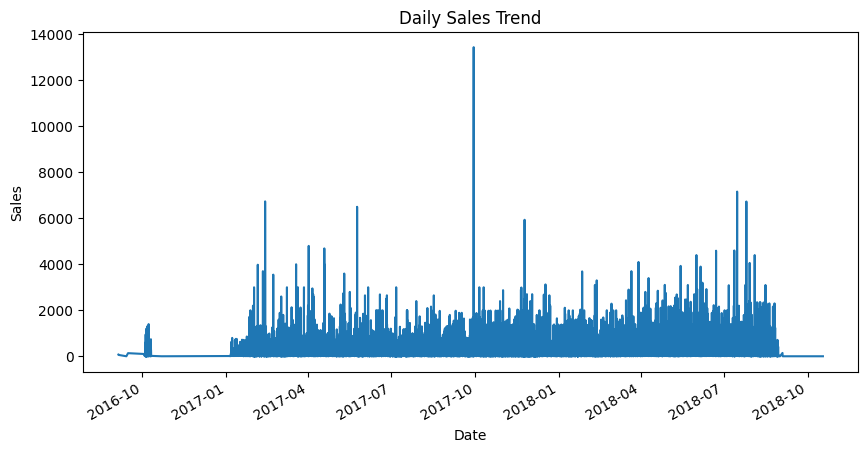

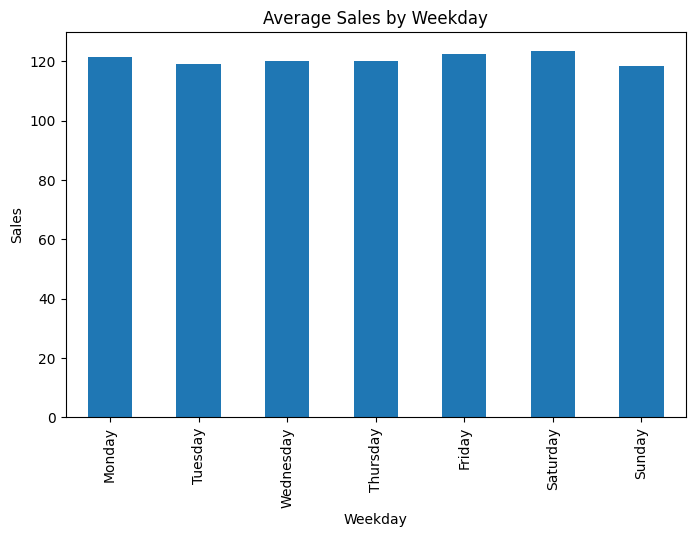

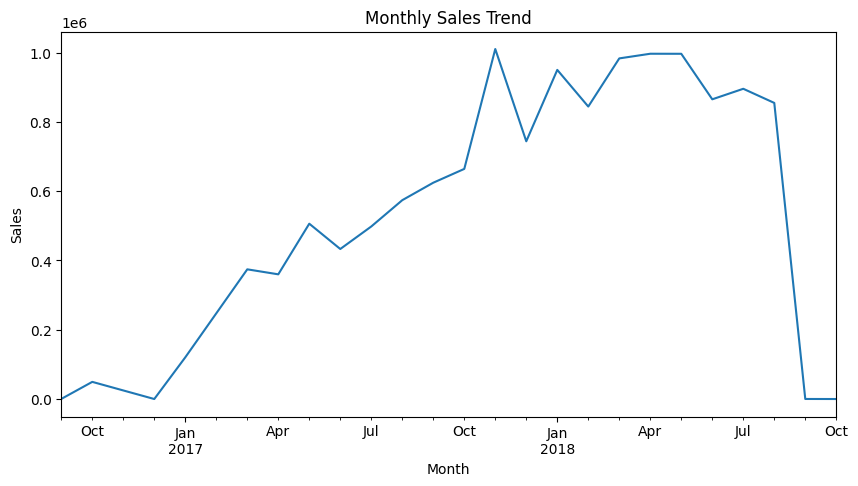

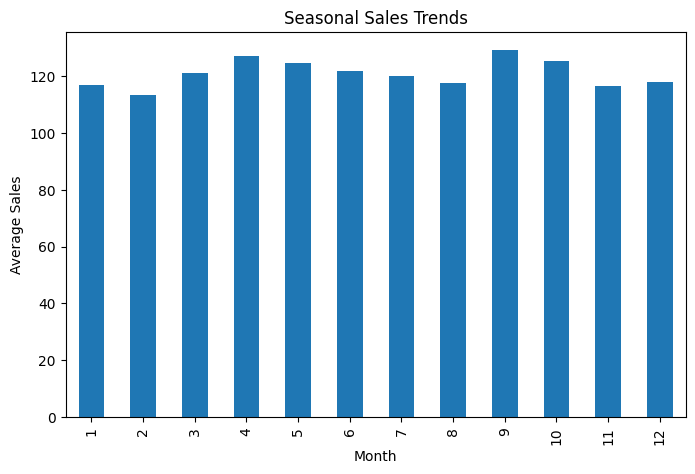

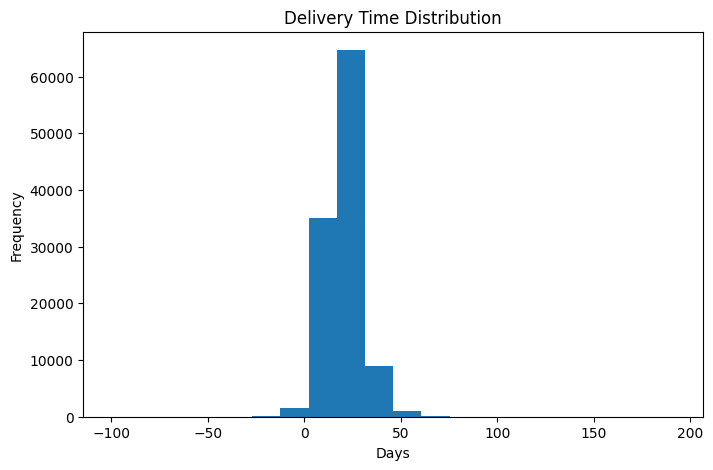

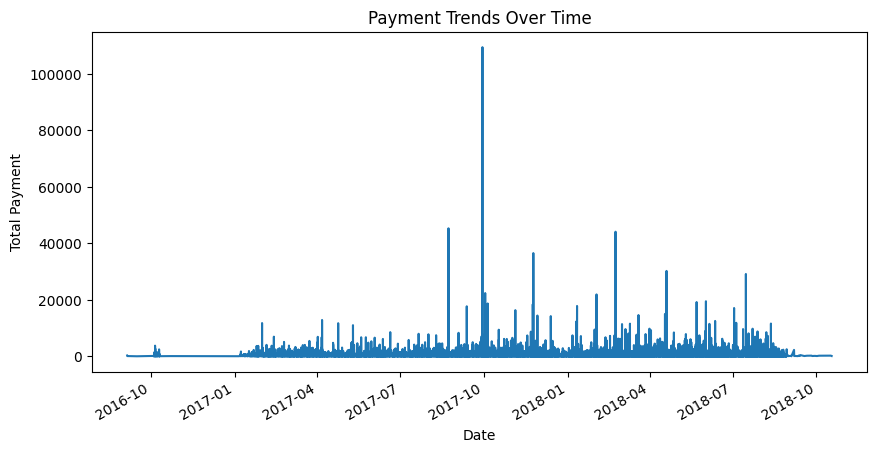

In [ ]:
#Phase 3: Exploratory Data Analysis (Part 3)
#TEMPORAL ANALYSIS
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
  # Load the orders dataset
orders = pd.read_csv('/content/drive/MyDrive/olist_orders_dataset.csv')
order_items = pd.read_csv('/content/drive/MyDrive/olist_order_items_dataset.csv')
df = pd.merge(orders, order_items[['order_id', 'price']], on='order_id', how='left')

# Analyze daily, weekly, and monthly sales patterns
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
df = df.rename(columns={'order_purchase_timestamp': 'order_date'})
df['order_date']=pd.to_datetime(df['order_date'])
df['year_month']=df['order_date'].dt.to_period('M')
df['weekday']=df['order_date'].dt.day_name()

# Daily Sales Trend
daily_sales=df.groupby('order_date')['price'].sum()
daily_sales.plot(figsize=(10, 5), title="Daily Sales Trend", xlabel="Date", ylabel="Sales")
plt.show()

# Weekly Sales Pattern
weekly_sales=df.groupby('weekday')['price'].mean()
weekly_sales=weekly_sales.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']) # Ensure order
weekly_sales.plot(kind='bar', figsize=(8, 5), title="Average Sales by Weekday", xlabel="Weekday", ylabel="Sales")
plt.show()

# Monthly Sales Trend
monthly_sales=df.groupby('year_month')['price'].sum()
monthly_sales.plot(figsize=(10, 5), title="Monthly Sales Trend", xlabel="Month", ylabel="Sales")
plt.show()

# Seasonal Trends
df['month']=df['order_date'].dt.month
seasonal_trend=df.groupby('month')['price'].mean()
seasonal_trend.plot(kind='bar', figsize=(8, 5), title="Seasonal Sales Trends", xlabel="Month", ylabel="Average Sales")
plt.show()

# Delivery Time Patterns
df['order_estimated_delivery_date']=pd.to_datetime(df['order_estimated_delivery_date'])
df['order_delivered_carrier_date'] = pd.to_datetime(df['order_delivered_carrier_date'], errors='coerce')
df['delivery_time']=(df['order_estimated_delivery_date'] - df['order_delivered_carrier_date']).dt.days
delivery_time_dist=df['delivery_time'].plot(kind='hist', bins=20, figsize=(8, 5), title="Delivery Time Distribution", xlabel="Days")
plt.show()

# Payment Patterns Over Time
order_payments=pd.read_csv('/content/drive/MyDrive/olist_order_payments_dataset.csv')
df=pd.merge(df, order_payments[['order_id', 'payment_value']], on='order_id', how='left')
# Now you can group by order_date and calculate the sum of payment_value
payment_pattern=df.groupby('order_date')['payment_value'].sum()
payment_pattern.plot(figsize=(10, 5), title="Payment Trends Over Time", xlabel="Date", ylabel="Total Payment")
plt.show()

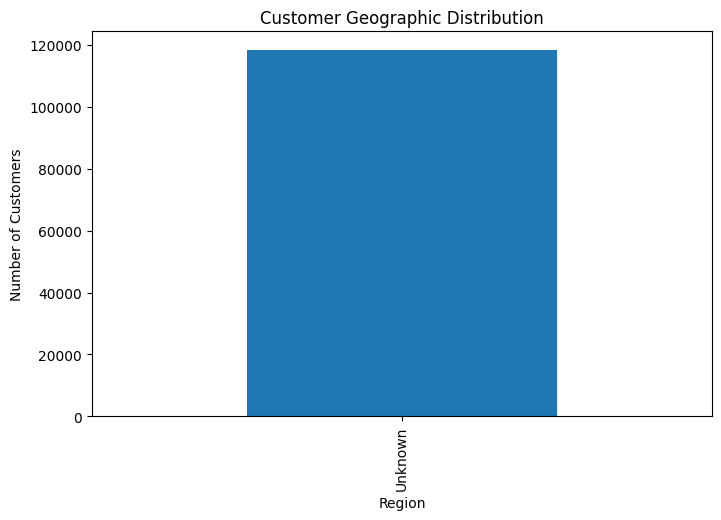

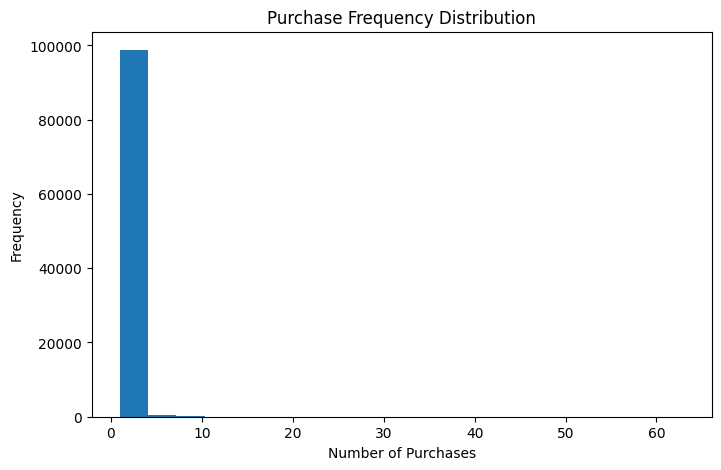

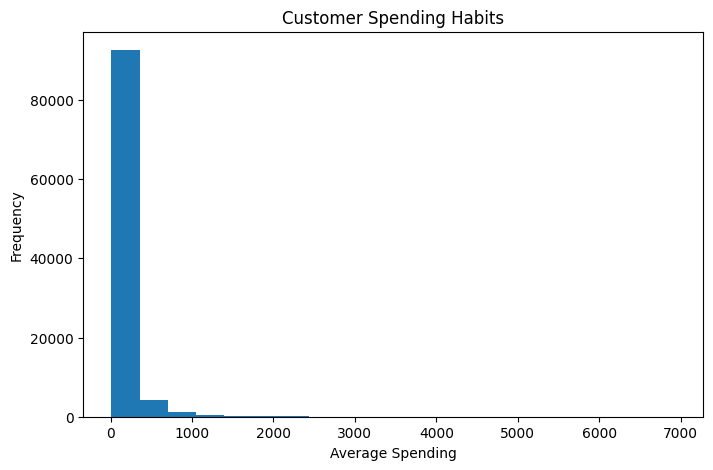

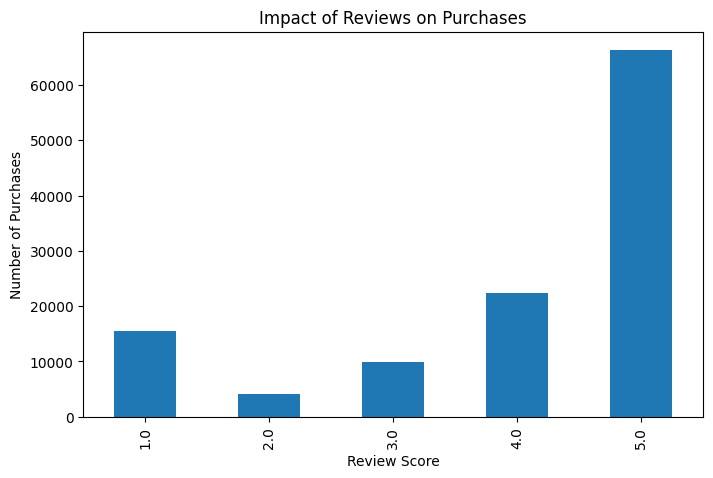

In [ ]:
#2. CUSTOMER ANALYSIS
# Analyze customer geographic distribution
customer_geo_dist = df['region'].value_counts()
customer_geo_dist.plot(kind='bar', figsize=(8, 5), title="Customer Geographic Distribution", xlabel="Region", ylabel="Number of Customers")
plt.show()

# Study Purchase Frequency Patterns
purchase_frequency = df.groupby('customer_id')['order_id'].count()
purchase_frequency.plot(kind='hist', bins=20, figsize=(8, 5), title="Purchase Frequency Distribution", xlabel="Number of Purchases")
plt.show()

# Examine Customer Spending Habits
spending_habits = df.groupby('customer_id')['order_amount'].mean()
spending_habits.plot(kind='hist', bins=20, figsize=(8, 5), title="Customer Spending Habits", xlabel="Average Spending")
plt.show()

# Impact of Reviews on Future Purchases
# Assuming review_score column exists
reviews = pd.read_csv('/content/olist_order_reviews_dataset.csv')
df = pd.merge(df, reviews[['order_id', 'review_score']], on='order_id', how='left')  # Merge to add 'review_score'
review_impact = df.groupby('review_score')['order_id'].count()
review_impact.plot(kind='bar', figsize=(8, 5), title="Impact of Reviews on Purchases", xlabel="Review Score", ylabel="Number of Purchases")
plt.show()



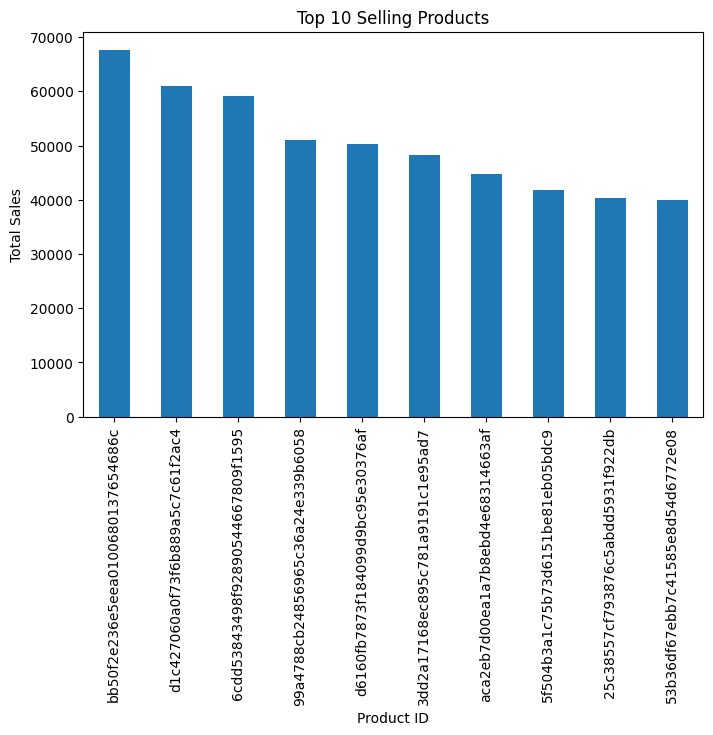

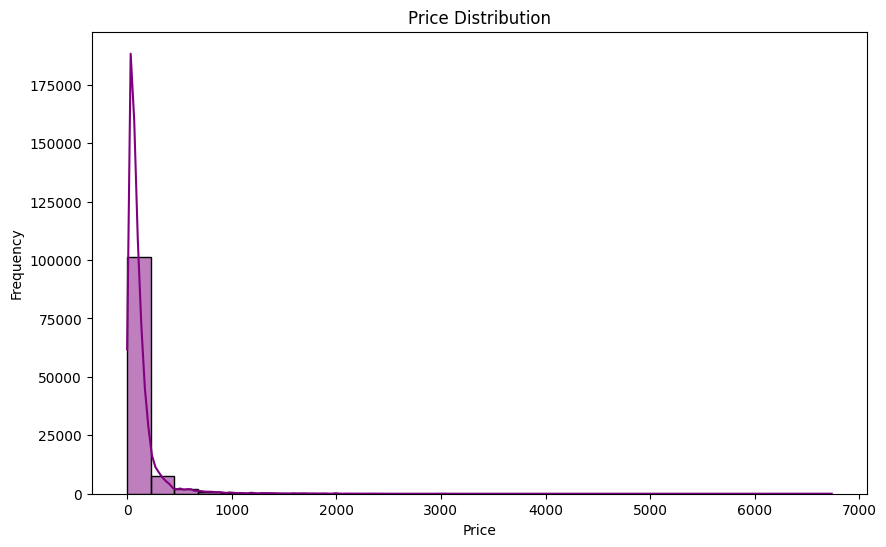

In [ ]:
#3. PRODUCT ANALYSIS
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the orders dataset
orders = pd.read_csv('/content/drive/MyDrive/olist_orders_dataset.csv')
order_items = pd.read_csv('/content/drive/MyDrive/olist_order_items_dataset.csv') # Load order_items here
#1. top sellings
# Merge with order_items to get price and freight_value
df = pd.merge(orders, order_items[['order_id', 'product_id', 'price', 'freight_value']], on='order_id', how='left') # Use 'orders' here
# Calculate order_amount after the merge
df['order_amount'] = df['price'] + df['freight_value']

top_products = df.groupby('product_id')['order_amount'].sum().nlargest(10)
top_products.plot(kind='bar', figsize=(8, 5), title="Top 10 Selling Products", xlabel="Product ID", ylabel="Total Sales")
plt.show()

# 2. Analyze price distributions
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=30, kde=True, color='purple')
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()



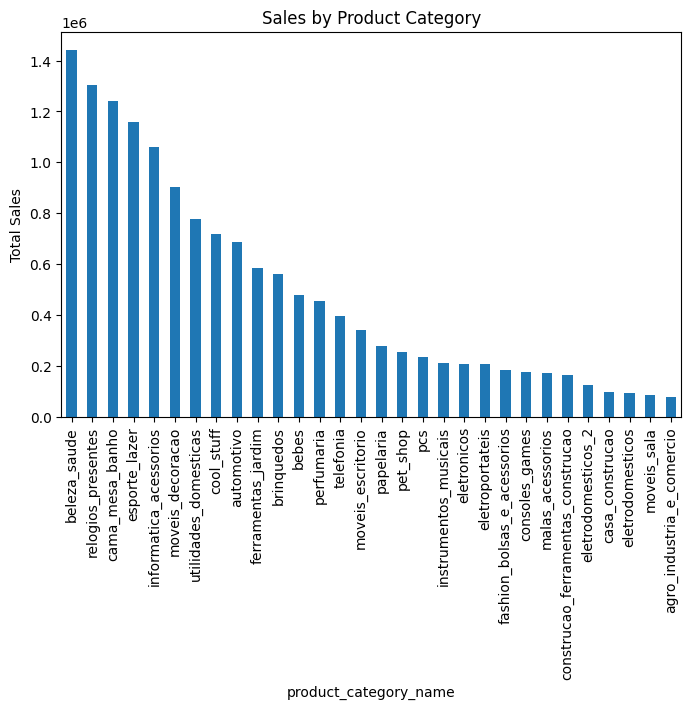

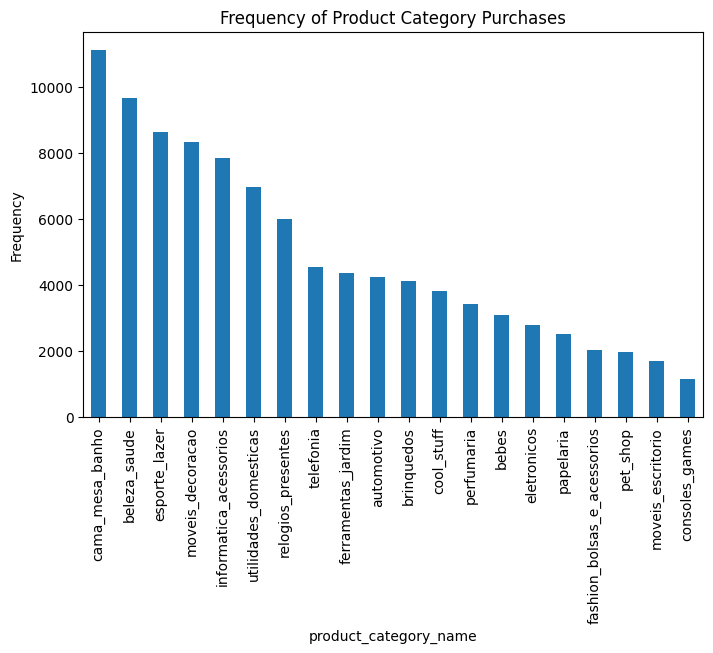

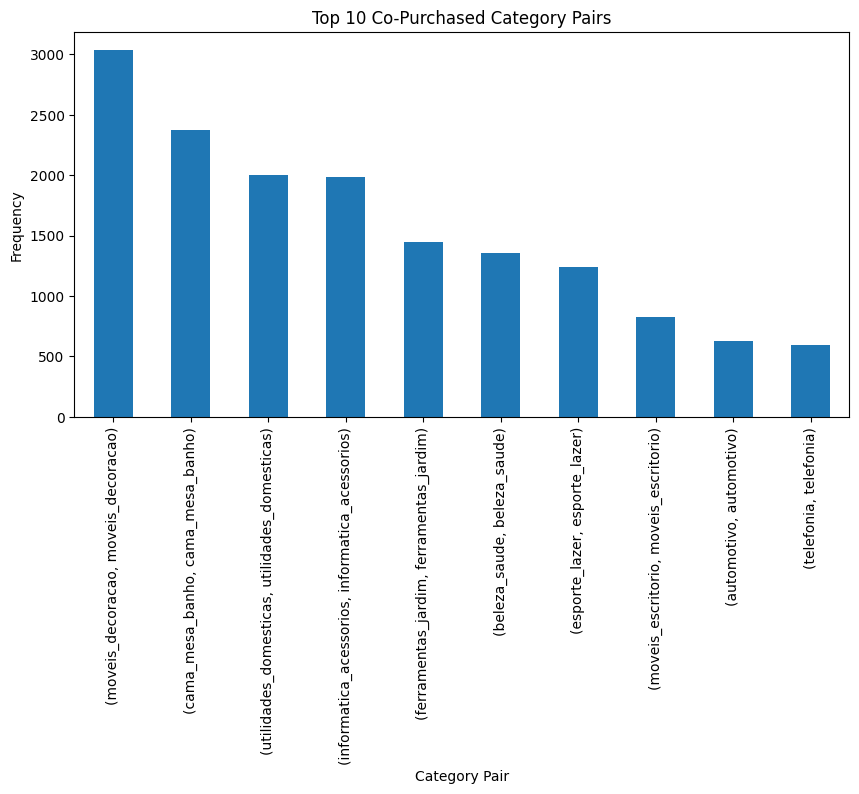

In [ ]:
# Analyze Sales by Product Category
# Analyze Sales by Product Category
import pandas as pd
import itertools
import matplotlib.pyplot as plt

# Load the orders dataset
orders = pd.read_csv('/content/drive/MyDrive/olist_orders_dataset.csv')

# Create the 'is_returned' column based on 'order_status'
orders['is_returned'] = orders['order_status'].apply(lambda x: 1 if x == 'returned' else 0)

# Load the order_items dataset
order_items = pd.read_csv('/content/drive/MyDrive/olist_order_items_dataset.csv')

# Merge orders and order_items to get product_id
df = pd.merge(orders, order_items[['order_id', 'product_id', 'price', 'freight_value']], on='order_id', how='left')

# Load the products dataset
products = pd.read_csv('/content/drive/MyDrive/olist_products_dataset.csv')

# Merge the merged dataframe with products to get product_category_name
df = pd.merge(df, products[['product_id', 'product_category_name']], on='product_id', how='left')

# Calculate order_amount after the merge
df['order_amount'] = df['price'] + df['freight_value']

# Now proceed with the analysis
category_sales = df.groupby('product_category_name')['order_amount'].sum().sort_values(ascending=False)
category_sales.head(30).plot(kind='bar', figsize=(8, 5), title="Sales by Product Category", xlabel="product_category_name", ylabel="Total Sales")
plt.show()

# Analyze Frequency of Product Category Purchases
category_frequency = df['product_category_name'].value_counts()
category_frequency.head(20).plot(kind='bar', figsize=(8, 5), title="Frequency of Product Category Purchases", xlabel="product_category_name", ylabel="Frequency")
plt.show()

#Analyze Co-Purchases
category_pairs = df.groupby('order_id')['product_category_name'].apply(lambda x: list(x))
# Filter out NaN values and convert to string before sorting
category_co_occurrence = pd.Series([tuple(sorted([str(item) for item in pair if pd.notna(item)]))
                                   for categories in category_pairs
                                   for pair in itertools.combinations(categories, 2)
                                   if len([str(item) for item in pair if pd.notna(item)]) == 2]) # Ensure pair has 2 valid items
co_occurrence_counts = category_co_occurrence.value_counts().head(10)
co_occurrence_counts.plot(kind='bar', figsize=(10, 5), title="Top 10 Co-Purchased Category Pairs", xlabel="Category Pair", ylabel="Frequency")
plt.show()

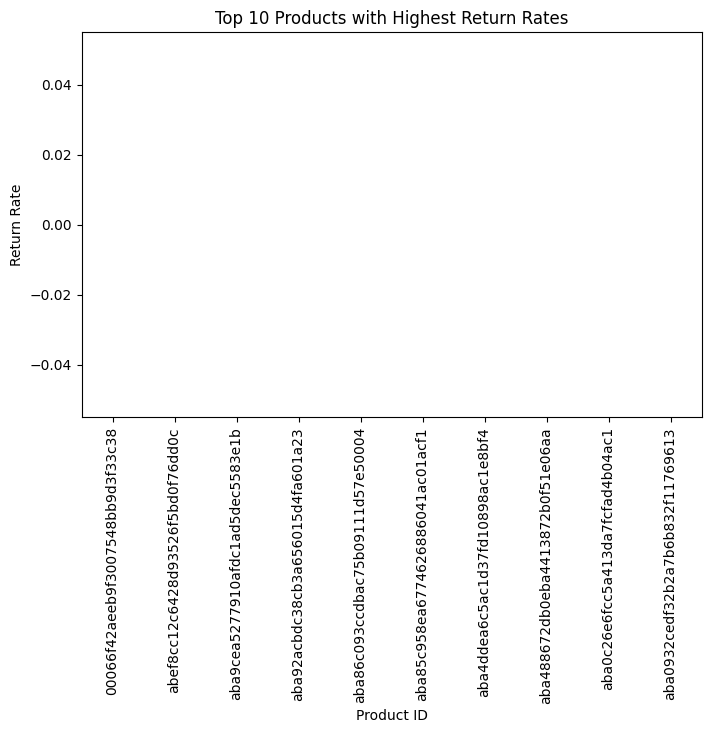

In [ ]:
# Calculate Return Rates
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate Return Rates
# Assuming 'is_returned' is a column where 1 indicates a return and 0 otherwise
df = pd.read_csv('/content/drive/MyDrive/olist_orders_dataset.csv')  # Load the orders dataset to get order status

# Create the 'is_returned' column based on 'order_status'
df['is_returned'] = df['order_status'].apply(lambda x: 1 if x == 'returned' else 0)
order_items = pd.read_csv('/content/drive/MyDrive/olist_order_items_dataset.csv')
df = pd.merge(df, order_items[['order_id', 'product_id']], on='order_id', how='left')
product_return_rate = df.groupby('product_id')['is_returned'].mean()
product_return_rate = product_return_rate.sort_values(ascending=False)

# Plot Return Rates for Top 10 Products
product_return_rate.head(10).plot(kind='bar', figsize=(8, 5), title="Top 10 Products with Highest Return Rates", xlabel="Product ID", ylabel="Return Rate")
plt.show()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113425 entries, 0 to 113424
Data columns (total 11 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       113425 non-null  object 
 1   customer_id                    113425 non-null  object 
 2   order_status                   113425 non-null  object 
 3   order_purchase_timestamp       113425 non-null  object 
 4   order_approved_at              113264 non-null  object 
 5   order_delivered_carrier_date   111457 non-null  object 
 6   order_delivered_customer_date  110196 non-null  object 
 7   order_estimated_delivery_date  113425 non-null  object 
 8   price                          112650 non-null  float64
 9   freight_value                  112650 non-null  float64
 10  order_amount                   112650 non-null  float64
dtypes: float64(3), object(8)
memory usage: 9.5+ MB
None
               price  freight_value   o

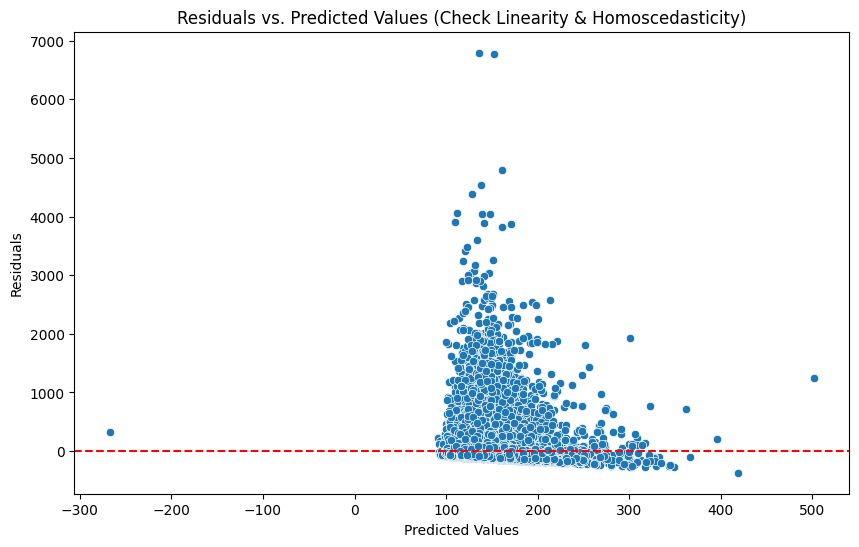

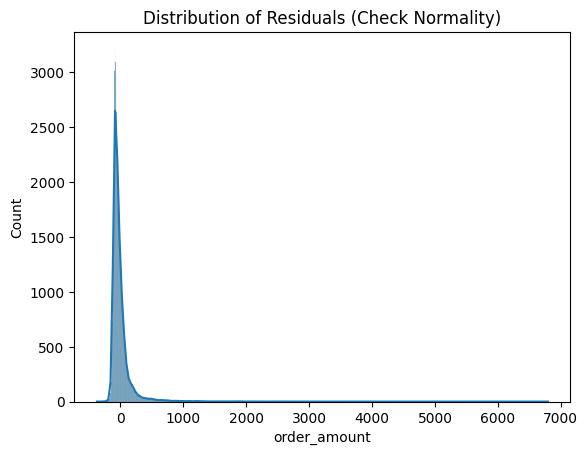

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


Variance Inflation Factor (VIF):
                        Features           VIF
0                          const      0.000000
1       order_purchase_timestamp  31188.978878
2              order_approved_at  32344.891668
3   order_delivered_carrier_date   2152.057572
4  order_delivered_customer_date    351.700479
5  order_estimated_delivery_date    340.887953
6                   order_status      0.393583
7                    customer_id      0.999687

Feature Importance (Coefficients):
                         Feature   Coefficient
6                    customer_id  2.297782e-05
2   order_delivered_carrier_date  2.683450e-14
5                   order_status  2.197706e-14
4  order_estimated_delivery_date  1.819736e-14
3  order_delivered_customer_date  7.724092e-15
1              order_approved_at  4.337198e-15
0       order_purchase_timestamp -5.674554e-14


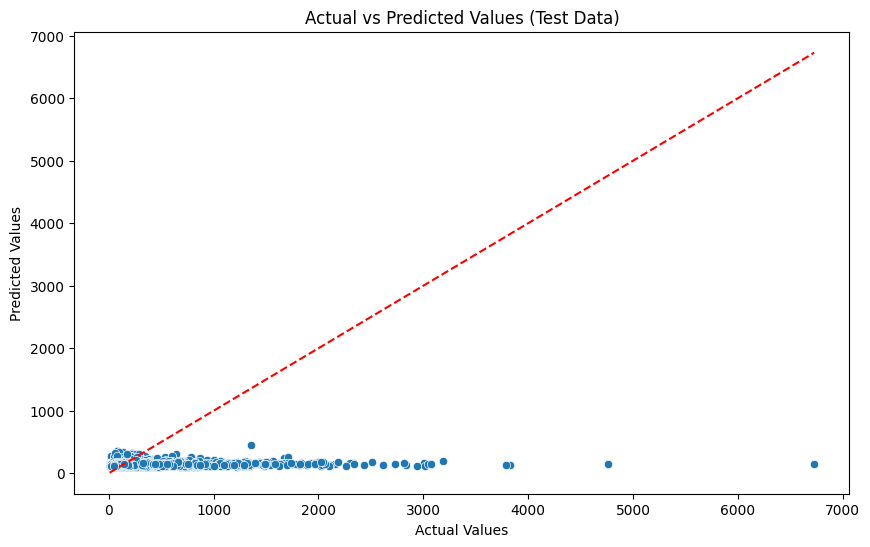

In [ ]:
#1. Data Modeling
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Load your dataset
data = pd.read_csv('/content/drive/MyDrive/olist_orders_dataset.csv')
order_items = pd.read_csv('/content/drive/MyDrive/olist_order_items_dataset.csv')

# Merge datasets
data = pd.merge(data, order_items[['order_id', 'price', 'freight_value']], on='order_id', how='left')

# Calculate order_amount
data['order_amount'] = data['price'] + data['freight_value']

# Check for missing values
print(data.info())
print(data.describe())
# Handle missing values
data = data.dropna()

# Feature and target selection
features = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date',
            'order_delivered_customer_date', 'order_estimated_delivery_date']

X = data[features].copy()  # Avoid SettingWithCopyWarning
for col in features:
    X[col] = pd.to_numeric(pd.to_datetime(X[col], errors='coerce'))  # Convert dates to numeric

# Convert categorical features to numerical using Label Encoding
categorical_features = ['order_status', 'customer_id']
for feature in categorical_features:
    label_encoder = LabelEncoder()
    X[feature] = label_encoder.fit_transform(data[feature])

# Define target variable
y = data['order_amount']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build and train Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Evaluation function
def evaluate_model(y_true, y_pred, dataset_type="Train"):
    r2 = r2_score(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    print(f"{dataset_type} Data Evaluation:")
    print(f"R² Score: {r2:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAE: {mae:.4f}")
    print("-" * 30)

# Evaluate model
evaluate_model(y_train, y_train_pred, "Train")
evaluate_model(y_test, y_test_pred, "Test")

#2. Model Evaluation
# Residual Analysis
residuals = y_train - y_train_pred
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_train_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Predicted Values (Check Linearity & Homoscedasticity)")
plt.show()
# Check for normality of residuals
sns.histplot(residuals, kde=True)
plt.title("Distribution of Residuals (Check Normality)")
plt.show()

# Multicollinearity (Variance Inflation Factor)
X_train_with_const = sm.add_constant(X_train)

vif = pd.DataFrame()
vif['Features'] = X_train_with_const.columns
vif['VIF'] = [variance_inflation_factor(X_train_with_const.values, i) for i in range(X_train_with_const.shape[1])]

print("Variance Inflation Factor (VIF):")
print(vif)

# Feature Importance (Coefficients)
coefficients = pd.DataFrame({
    "Feature": X_train.columns,
    "Coefficient": model.coef_
}).sort_values(by="Coefficient", ascending=False)

print("\nFeature Importance (Coefficients):")
print(coefficients)

# Plot Actual vs Predicted values for test data
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_test_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values (Test Data)")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.show()
